In [3]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

In [4]:
import numpy as np
import pickle
import pandas as pd
from matplotlib import  pyplot as plt
import  seaborn as sns
from helper_funcs import *

from tqdm import tqdm_notebook as tqdm
from datetime import datetime

In [5]:
df = pd.read_csv('../Data/ABIDE_legend_S982_pca.csv')
df.head()

Unnamed: 0  Unnamed: 0.1  index  BIDS_ID Anonymized ID Subject Type  \
0           0             0      0  sub-001     A00033348      PATIENT   
1           1             1      1  sub-002     A00033398      CONTROL   
2           2             2      2  sub-003     A00033352      PATIENT   
3           3             3      3  sub-004     A00033389      CONTROL   
4           4             4      4  sub-005     A00033354      PATIENT   

       Visit  Days since enrollment  SubID  DxGroup  ...  Medication Name.1  \
0  session_1                      8  51320        1  ...                NaN   
1  session_1                      8  51373        2  ...                NaN   
2  session_1                      8  51324        1  ...                NaN   
3  session_1                      8  51364        2  ...                NaN   
4  session_1                      8  51326        1  ...                NaN   

   Off stimulants at EPI scan?  ScanSite  ScannerType  ScannerID  ScanSiteID  \
0                          NaN       mpg        verio          7           3   
1                          NaN       mpg        verio          7           3   
2                          NaN       mpg        verio          7           3   
3                          NaN       mpg        verio          7           3   
4                          NaN       mpg        verio          7           3   

  ADOS_PCA ADI_PCA Vineland_PCA  WISC_PCA  
0        0       0            0         0  
1        0       0            0         0  
2        0       0            0         0  
3        0       0            0         0  
4        0       0            0         0  

[5 rows x 95 columns]

In [6]:
subs = np.load('../Data/ABIDE-subs-982.npz')['subs']

In [7]:
assert len(subs)==len(df), 'diff lenghts'
assert all([subs[s]==df['BIDS_ID'].values[s] for s in range(len(df))]), 'bad order'

In [8]:
patients = df['DxGroup'].values==1

In [9]:
fn = '../Data/embedded_data.pickle'
data = pickle.load(open(fn,'rb'))
np.array(list(data.keys()))

array(['embedding_bg', 'embedding_sl', 'embedding_vae',
       'sfari_embedding_vae', 'sfari_embedding_bg', 'sfari_embedding_sl',
       'bg_space_abide', 'sl_space_abide', 'vae_space_abide',
       'bg_space_sfari', 'sl_space_sfari', 'vae_space_sfari',
       'bg_Sspace_sfari', 'sl_Sspace_sfari', 'vae_Sspace_sfari',
       'reducer_bg_abide', 'reducer_sl_abide', 'reducer_vae_abide',
       'reducer_bg_sfari', 'reducer_sl_sfari', 'reducer_vae_sfari'],
      dtype='<U19')

In [10]:
for key in data.keys():
    try:
        print(f'{key} | {data[key].shape}')
    except:
        pass

embedding_bg | (470, 16)
embedding_sl | (470, 16)
embedding_vae | (470, 32)
sfari_embedding_vae | (51, 32)
sfari_embedding_bg | (51, 16)
sfari_embedding_sl | (51, 16)
bg_space_abide | (470, 2)
sl_space_abide | (470, 2)
vae_space_abide | (470, 2)
bg_space_sfari | (51, 2)
sl_space_sfari | (51, 2)
vae_space_sfari | (51, 2)
bg_Sspace_sfari | (51, 2)
sl_Sspace_sfari | (51, 2)
vae_Sspace_sfari | (51, 2)


In [11]:
#data_latent = np.load('../Data/latent_vecs100.npz')
data_latent = np.load('../Data/latent_vecs2.npz')
list(data_latent.keys())
print(data_latent['salient_vec_abide'].shape)

(10, 982, 16)


In [12]:
data_latent['salient_vec_abide'][0,:,:]

array([[-0.4272499 ,  0.2735272 , -2.7508783 , ..., -0.91731685,
         0.1433426 , -1.1449697 ],
       [-1.4786693 , -0.7763392 , -1.2325766 , ...,  0.0499858 ,
         0.5017805 ,  0.6354925 ],
       [-2.1715796 ,  1.5461673 ,  0.53020257, ..., -0.15939587,
        -0.6093791 , -0.77931774],
       ...,
       [-0.16703203,  0.08689937, -0.4655738 , ...,  1.1736007 ,
        -0.59409565, -1.0329659 ],
       [-1.2406087 , -0.45388728, -0.7552429 , ..., -1.2301507 ,
         0.5705857 , -2.9799838 ],
       [-1.0072553 , -0.18212083, -0.8699565 , ...,  1.8765252 ,
        -0.291705  , -0.71864563]], dtype=float32)

In [13]:
now = datetime.now
t0 = now()
print(t0)

2021-08-31 13:38:46.422917


In [14]:
%%capture
n = 10 
umap_mat = np.zeros((n,470,2))
for i in tqdm(range(n)):
    umap_mat[i,:,:] = data['reducer_sl_abide'].transform(data_latent['salient_vec_abide'][i,patients,:])

In [15]:
print(now())
print(now()-t0)

2021-08-31 13:39:14.696420
0:00:28.273673


In [16]:
umap_mat.shape

(10, 470, 2)

<ErrorbarContainer object of 3 artists>

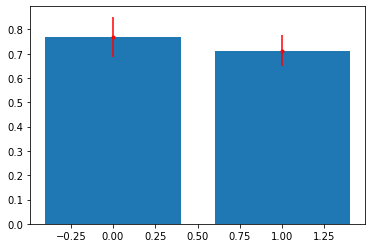

In [17]:
y = [get_triu(np.corrcoef(umap_mat[:,:,0])).mean(),get_triu(np.corrcoef(umap_mat[:,:,1])).mean()]
se = [get_triu(np.corrcoef(umap_mat[:,:,0])).std(),get_triu(np.corrcoef(umap_mat[:,:,1])).std()]
plt.bar([0,1],y)
plt.errorbar([0,1],y,se,fmt='r.')

In [254]:
def plot_error_bar(y,xlbls=None,title=None):
    #y = [r_x,r_y]
    xs = np.arange(len(y))
    m = [val.mean() for val in y]
    se = [val.std() for val in y]
    m = [abs(val) for val in m]
#    m = [abs(val) for val in ]

    t,p = stats.ttest_1samp(y[0],0)
    star_idx = max(np.nonzero(np.float64(p) < [1,.05,.01,.001])[0])
    star_lbls = ['n.s','*','**','***']
    xlbls[0] = xlbls[0]+'\n'+star_lbls[star_idx]

    t,p = stats.ttest_1samp(y[1],0)
    star_idx = max(np.nonzero(np.float64(p) < [1,.05,.01,.001])[0])
    star_lbls = ['n.s','*','**','***']
    xlbls[1] = xlbls[1]+'\n'+star_lbls[star_idx]
    
    plt.bar(xs,m)
    plt.errorbar(xs,m,se,fmt='r.')
    
    t,p = stats.ttest_rel(y[0],y[1])
    star_idx = max(np.nonzero(np.float64(p) < [1,.05,.01,.001])[0])
    yy = max(m)+max(se)
    yy = yy*1.1
    plt.plot([0,1],[yy,yy],'k-',linewidth=3)
    plt.text(.5,yy,star_lbls[star_idx],fontsize=24)
    
    if xlbls:
        plt.xticks(xs,labels=xlbls,fontsize=14)
    if title:
        plt.title(title,fontsize=12)
    plt.ylim(0,yy*1.2)

In [40]:
def plot_scatters(x,ys):
    plt.figure(figsize=np.array((10,5))*.85)
    plt.subplot(1,2,1)
    #x = vec[v]
    #y = umap_mat[i,v,0]
    #print(x.shape)
    #print(ys[0].shape)
    plt.scatter(x,ys[0])

    m,b = np.polyfit(x, ys[0], 1)
    plt.plot(x,m*x+b,'r-',linewidth=3)

    plt.subplot(1,2,2)
    #x,y = vec[v],umap_mat[i,v,1]
    plt.scatter(x,ys[1])

    m,b = np.polyfit(x, ys[1], 1)
    plt.plot(x,m*x+b,'r-',linewidth=3)

In [174]:
n=10

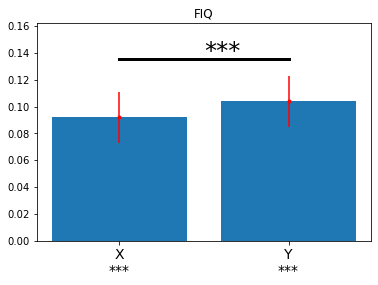

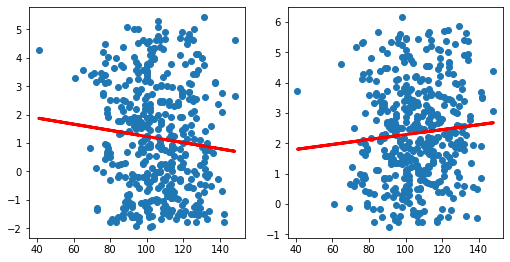

In [256]:
key = 'FIQ'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

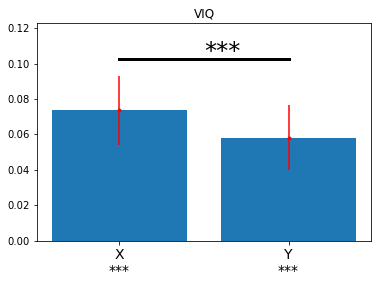

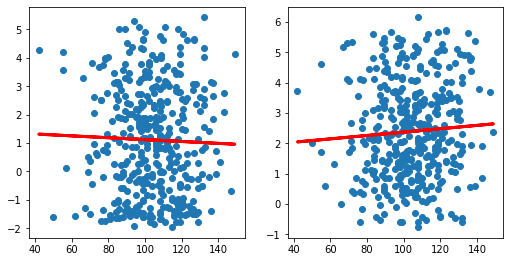

In [257]:
key = 'VIQ'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

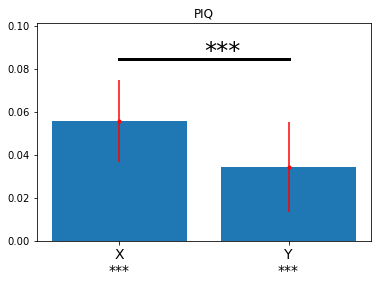

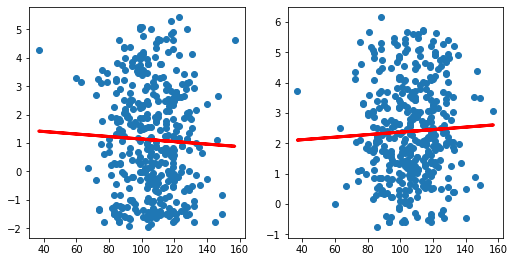

In [258]:
key = 'PIQ'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [42]:
import scipy.stats as stats
stats.ttest_rel(abs(r_x),abs(r_y))

Ttest_relResult(statistic=-1.1577914126215232, pvalue=0.2767502999010393)

In [314]:
from sklearn.metrics import normalized_mutual_info_score as mi

In [317]:
# key = 'Sex'
# vec = df[key].values[patients]
# v = ~np.isnan(vec)
# # r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
# # r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
# r_x = np.array([mi(vec[v],umap_mat[i,v,0]) for i in range(n)])
# r_y = np.array([mi(vec[v],umap_mat[i,v,1]) for i in range(n)])
# plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
# #plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [319]:
# key = 'AgeAtScan'
# vec = df[key].values[patients]
# v = ~np.isnan(vec)
# r_x = np.array([mi(vec[v],umap_mat[i,v,0]) for i in range(n)])
# r_y = np.array([mi(vec[v],umap_mat[i,v,1]) for i in range(n)])
# plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
# i = 5
# plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

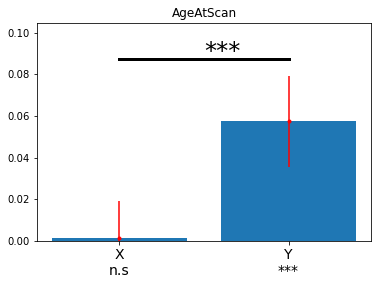

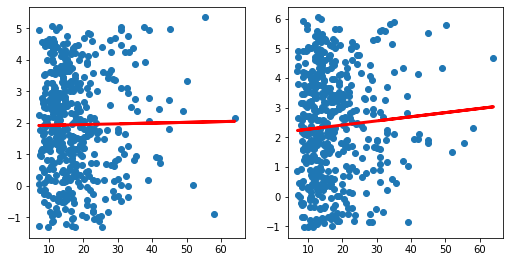

In [304]:
key = 'AgeAtScan'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
i = 5
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

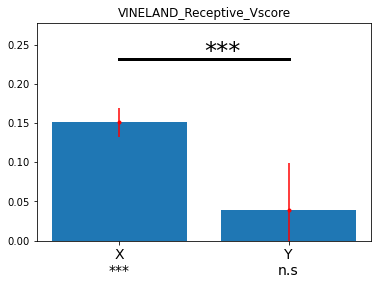

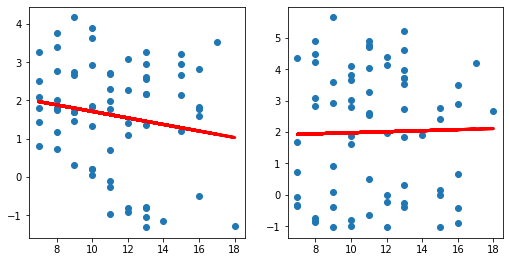

In [369]:
key = 'VINELAND_Receptive_Vscore'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [49]:
from sklearn.decomposition import PCA

In [50]:
# keys =  ['ADOS_Module', 'ADOS_Total', 'ADOS_ResearchReliability',  'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh']
# keys = ['ADI_R_SocialTotal', 'ADI_R_VerbalTotal', 'ADI_R_RRB','ADI_R_Onset Total', 'ADI_R_ResearchReliability']
# #keys = ['ADOSGotham_SocAffect', 'ADOSGotham_Rest-RepBeh', 'ADOSGotham_Total', 'ADOSGotham_Severity']
# # keys =  ['VINELAND_Receptive_Vscore',
# #  'VINELAND_Expressive_Vscore',
# #  'VINELAND_Written_Vscore',
# #  'VINELAND_CommunicationStandard',
# #  'VINELAND_Personal_Vscore',
# #  'VINELAND_Domestic_Vscore',
# #  'VINELAND_Community_Vscore',
# #  'VINELAND_DaylyLiving_Standard',
# #  'VINELAND_Interpersonal_Vscore',
# #  'VINELAND_Play_Vscore',
# #  'VINELAND_Coping_Vscore',
# #  'VINELAND_Socical_Standard',
# #  'VINELAND_Domestic_Standard',
# #  'VINELAND_ABC_Standard',
# #  'VINELAND_Informant']



# mat = df[keys].values[patients,:]
# v = np.isnan(mat).sum(axis=1)==0
# mat = mat[v,:]
# #mat = stats.zscore(mat,axis=0)
# reducer = PCA(n_components=1)
# comp = reducer.fit_transform(mat)

# r_x = np.array([np.corrcoef(comp[:,0],umap_mat[i,v,0])[0,1] for i in range(n)])
# r_y = np.array([np.corrcoef(comp[:,0],umap_mat[i,v,1])[0,1] for i in range(n)])
# plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
# plot_scatters(comp[:,0],[umap_mat[i,v,0],umap_mat[i,v,1]])
# #plot_scatters(comp[:,1],[umap_mat[i,v,0],umap_mat[i,v,1]])

# # r_x = np.array([np.corrcoef(comp[:,0],umap_mat[i,v,0])[0,1] for i in range(n)])
# # r_y = np.array([np.corrcoef(comp[:,0],umap_mat[i,v,1])[0,1] for i in range(n)])
# # plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
# # plot_scatters(comp[:,0],[umap_mat[i,v,0],umap_mat[i,v,1]])

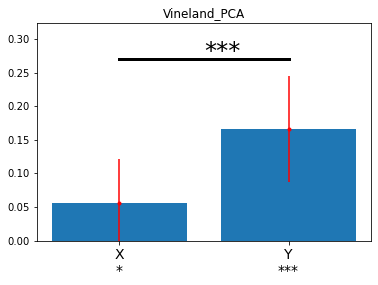

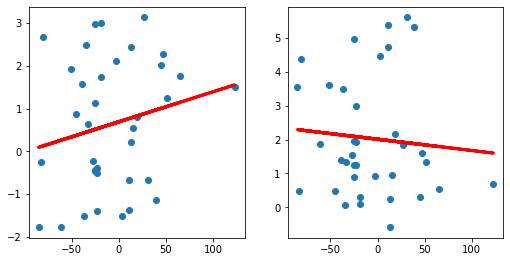

In [263]:
key = 'Vineland_PCA'
vec = df[key].values[patients]
v = ~np.isnan(vec)& vec!=0
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

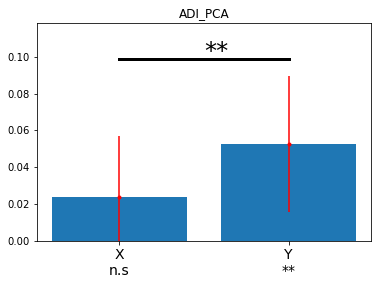

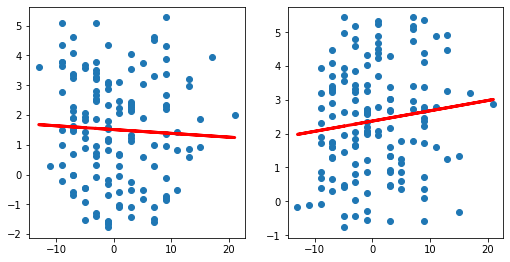

In [264]:
key = 'ADI_PCA'
vec = df[key].values[patients]
v = ~np.isnan(vec) & vec!=0
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

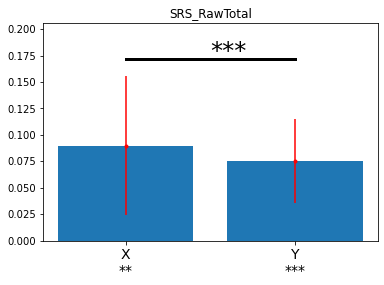

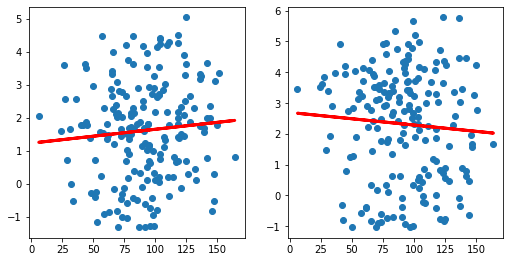

In [376]:
key = 'SRS_RawTotal'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

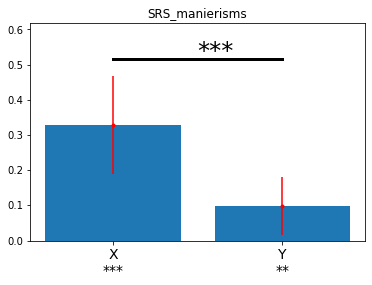

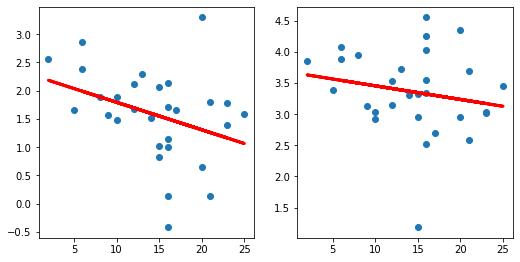

In [378]:
key = 'SRS_manierisms'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [266]:
stats.ttest_rel(abs(r_x),abs(r_y))

Ttest_relResult(statistic=2.3037150034696734, pvalue=0.04671454071843703)

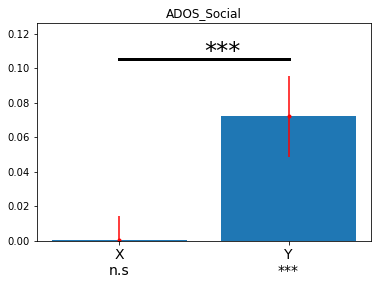

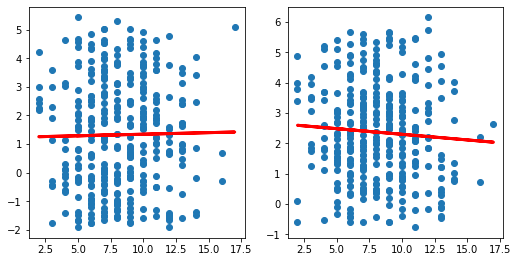

In [267]:
key = 'ADOS_Social'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [268]:
# plt.scatter(vec[v],umap_mat[i,v,1])
# m, b = np.polyfit(vec[v],umap_mat[i,v,1],1)
# plt.plot(vec[v], m*vec[v] + b,'r-')

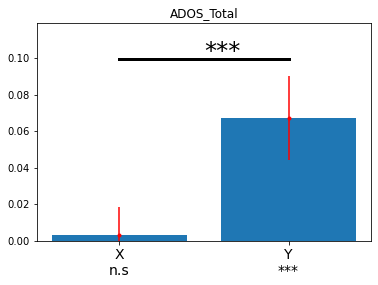

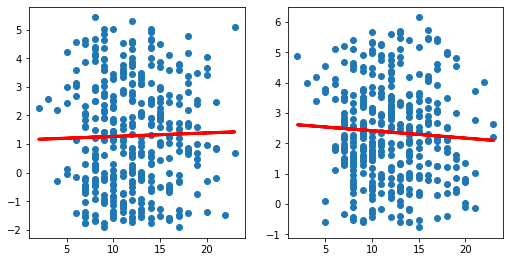

In [269]:
key = 'ADOS_Total'
vec = df[key].values[patients]
v = ~np.isnan(vec)
r_x = np.array([np.corrcoef(vec[v],umap_mat[i,v,0])[0,1] for i in range(n)])
r_y = np.array([np.corrcoef(vec[v],umap_mat[i,v,1])[0,1] for i in range(n)])
plot_error_bar([r_x,r_y],xlbls=['X','Y'],title=key)
plot_scatters(vec[v],[umap_mat[i,v,0],umap_mat[i,v,1]])

In [270]:
import sklearn

In [271]:
PCA = sklearn.decomposition.PCA

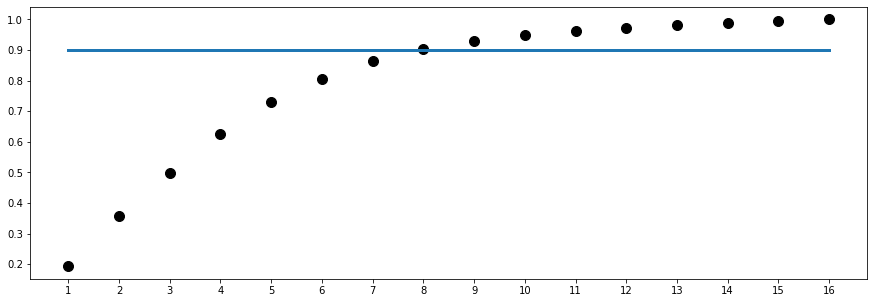

In [272]:
pca = PCA()
comp = pca.fit_transform(data['embedding_bg'])
y = np.cumsum(pca.explained_variance_ratio_)
n = len(y)
x = np.arange(n)
plt.figure(figsize=(15,5))
plt.plot(y,'k.',markersize=20);
plt.plot(x,np.repeat(.9,n),linewidth=3);
plt.xticks(x,labels=x+1);

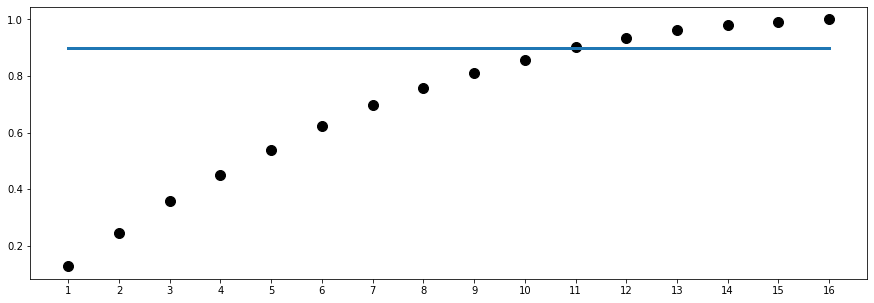

In [273]:
pca = PCA()
comp = pca.fit_transform(data['embedding_sl'])
y = np.cumsum(pca.explained_variance_ratio_)
n = len(y)
x = np.arange(n)
plt.figure(figsize=(15,5))
plt.plot(y,'k.',markersize=20);
plt.plot(x,np.repeat(.9,n),linewidth=3);
plt.xticks(x,labels=x+1);

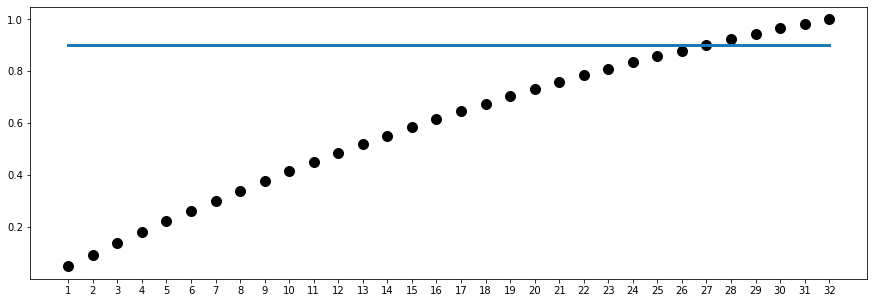

In [274]:
pca = PCA()
comp = pca.fit_transform(data['embedding_vae'])
y = np.cumsum(pca.explained_variance_ratio_)
n = len(y)
x = np.arange(n)
plt.figure(figsize=(15,5))
plt.plot(y,'k.',markersize=20);
plt.plot(x,np.repeat(.9,n),linewidth=3);
plt.xticks(x,labels=x+1);

In [275]:
umap_mat.shape

(10, 470, 2)

In [276]:
# Zobserved = (z1 – z2) / (square root of [ (1 / N1 – 3) + (1 / N2 – 3) ]

In [277]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'BIDS_ID', 'Anonymized ID',
       'Subject Type', 'Visit', 'Days since enrollment', 'SubID', 'DxGroup',
       'DSMIVTR', 'AgeAtScan', 'Sex', 'FIQ', 'VIQ', 'PIQ', 'IQTest', 'VIQTest',
       'PIQTest', 'ADOS_Module', 'ADOS_Total', 'ADOS_ResearchReliability',
       'ADI_R_SocialTotal', 'ADI_R_VerbalTotal', 'ADI_R_RRB',
       'ADI_R_Onset Total', 'ADI_R_ResearchReliability', 'Handedness_Category',
       'Handedness_Scores', 'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh',
       'Comorbid_adhd', 'Comorbid_phobia', 'comorbid_anxiety', 'comorbid_all',
       'comorbid_other', 'Comorbidity', 'SRS_RawTotal', 'SRS_Version',
       'SCQ_Total', 'VINELAND_Receptive_Vscore', 'VINELAND_Expressive_Vscore',
       'VINELAND_Written_Vscore', 'VINELAND_CommunicationStandard',
       'VINELAND_Personal_Vscore', 'VINELAND_Domestic_Vscore',
       'VINELAND_Community_Vscore', 'VINELAND_DaylyLiving_Standard',
       'VINELAND_Interpersonal_Vscore', 'VINELAND_Pla

In [392]:
key_list = ['AgeAtScan','FIQ','ADOS_Total','ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh','ADI_R_SocialTotal', 'ADI_R_VerbalTotal', 'ADI_R_RRB','ADI_R_Onset Total',
          'SRS_RawTotal',
       'SCQ_Total',
           'ADOSGotham_SocAffect', 'ADOSGotham_Rest-RepBeh',
       'ADOSGotham_Total', 'ADOSGotham_Severity',
       'AQ Total','ADOS_PCA',
       'ADI_PCA', 'Vineland_PCA', 'WISC_PCA']

key_list = ['AgeAtScan','FIQ','ADOS_Total','ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh','ADI_R_SocialTotal', 'ADI_R_VerbalTotal', 'ADI_R_RRB','ADI_R_Onset Total',
          'SRS_RawTotal',
       'SCQ_Total',
           'ADOSGotham_SocAffect', 'ADOSGotham_Rest-RepBeh',
       'ADOSGotham_Total', 'ADOSGotham_Severity',
       'AQ Total','ADOS_PCA',
       'ADI_PCA', 'Vineland_PCA', 'WISC_PCA','VINELAND_Written_Vscore', 'VINELAND_CommunicationStandard',
       'VINELAND_Personal_Vscore', 'VINELAND_Domestic_Vscore',
       'VINELAND_Community_Vscore', 'VINELAND_DaylyLiving_Standard',
       'VINELAND_Interpersonal_Vscore', 'VINELAND_Play_Vscore',
       'VINELAND_Coping_Vscore', 'VINELAND_Socical_Standard',
       'VINELAND_Domestic_Standard', 'VINELAND_ABC_Standard','WISC4 VCI Verbal Comprehension Index',
       'WISC4 PRI Perceptual Reasoning Index',
       'WISC4 WMI Working Memory Index', 'WISC4 PSI Processing Speed Index',
       'WISC4 Sim Scaled', 'WISC4 Vocab Scaled', 'WISC4 Info Scaled',
       'WISC4 Blk Dsn Scaled', 'WISC4 Pic Con Scaled', 'WISC4 Matrix Scaled',
       'WISC4 Dig Span Scaled', 'WISC4 Let Num Scaled', 'WISC4 Coding Scaled',
       'WISC4 Sym Scaled','VIQ', 'PIQ']

In [393]:
key

'PIQ'

In [394]:
r_list = np.zeros((len(key_list),5))
for idx,key in enumerate(key_list):
    vec = df[key].values[patients]
    v = ~np.isnan(vec)
#     r1 = np.corrcoef(vec[v],umap_mat[0,v,0])[0,1]
#     r2 = np.corrcoef(vec[v],umap_mat[0,v,1])[0,1]

    pr1 = stats.pearsonr(vec[v],umap_mat[0,v,0])
    pr2 = stats.pearsonr(vec[v],umap_mat[0,v,1])
    r_list[idx,0] = pr1[0]
    r_list[idx,1] = pr2[0]
    
    r_list[idx,2] = pr1[1]
    r_list[idx,3] = pr2[1]
    
    r_list[idx,4] = len(vec[v])

In [395]:
dr = pd.DataFrame()

In [396]:
dr['key'] = key_list
dr['rx'] = abs(r_list[:,0])
dr['ry'] = abs(r_list[:,1])
dr['rdelta'] = abs(r_list[:,0])-abs(r_list[:,1])

dr['px'] = r_list[:,2]
dr['py'] = r_list[:,3]
dr['n'] = r_list[:,4]

In [398]:
dr = dr[dr['n']>100]

In [399]:
dr

key        rx        ry    rdelta        px        py  \
0                AgeAtScan  0.002640  0.070888 -0.068248  0.954481  0.124870   
1                      FIQ  0.091869  0.099221 -0.007352  0.057556  0.040193   
2               ADOS_Total  0.033078  0.079545 -0.046468  0.526459  0.127196   
3                ADOS_Comm  0.027358  0.014221  0.013137  0.613089  0.792687   
4              ADOS_Social  0.030311  0.073979 -0.043668  0.574738  0.170378   
5               ADOS_StBeh  0.115933  0.028877  0.087056  0.050564  0.627351   
6        ADI_R_SocialTotal  0.023526  0.019244  0.004282  0.679899  0.735752   
7        ADI_R_VerbalTotal  0.014940  0.017241 -0.002301  0.792994  0.762002   
8                ADI_R_RRB  0.098479  0.041413  0.057065  0.083434  0.467517   
9        ADI_R_Onset Total  0.038872  0.019229  0.019643  0.514865  0.747396   
10            SRS_RawTotal  0.108989  0.123514 -0.014524  0.134429  0.089547   
12    ADOSGotham_SocAffect  0.076929  0.070260  0.006668  0.285102  0.329049   
13  ADOSGotham_Rest-RepBeh  0.112735  0.123479 -0.010744  0.111971  0.081511   
14        ADOSGotham_Total  0.097611  0.083934  0.013677  0.173495  0.242154   
15     ADOSGotham_Severity  0.090785  0.080692  0.010093  0.205702  0.260887   
17                ADOS_PCA  0.012097  0.065901 -0.053805  0.793662  0.153739   
18                 ADI_PCA  0.009713  0.001830  0.007883  0.833648  0.968433   
19            Vineland_PCA  0.018893  0.001372  0.017521  0.682887  0.976340   
20                WISC_PCA  0.030703  0.036618 -0.005915  0.506679  0.428355   
47                     VIQ  0.054984  0.071477 -0.016493  0.279970  0.159963   
48                     PIQ  0.086132  0.000098  0.086033  0.090632  0.998465   

        n  
0   470.0  
1   428.0  
2   369.0  
3   344.0  
4   345.0  
5   285.0  
6   310.0  
7   311.0  
8   310.0  
9   283.0  
10  190.0  
12  195.0  
13  200.0  
14  196.0  
15  196.0  
17  470.0  
18  470.0  
19  470.0  
20  470.0  
47  388.0  
48  387.0

In [385]:
dr.head()

key        rx        ry    rdelta        px        py      n
0    AgeAtScan  0.002640  0.070888 -0.068248  0.954481  0.124870  470.0
1          FIQ  0.091869  0.099221 -0.007352  0.057556  0.040193  428.0
2   ADOS_Total  0.033078  0.079545 -0.046468  0.526459  0.127196  369.0
3    ADOS_Comm  0.027358  0.014221  0.013137  0.613089  0.792687  344.0
4  ADOS_Social  0.030311  0.073979 -0.043668  0.574738  0.170378  345.0

In [386]:
dr.sort_values(by='px',ascending=True).head(5)

key        rx        ry    rdelta        px        py  \
5               ADOS_StBeh  0.115933  0.028877  0.087056  0.050564  0.627351   
1                      FIQ  0.091869  0.099221 -0.007352  0.057556  0.040193   
8                ADI_R_RRB  0.098479  0.041413  0.057065  0.083434  0.467517   
48                     PIQ  0.086132  0.000098  0.086033  0.090632  0.998465   
13  ADOSGotham_Rest-RepBeh  0.112735  0.123479 -0.010744  0.111971  0.081511   

        n  
5   285.0  
1   428.0  
8   310.0  
48  387.0  
13  200.0

In [387]:
dr.sort_values(by='py',ascending=True).head(5)

key        rx        ry    rdelta  \
1                                    FIQ  0.091869  0.099221 -0.007352   
41                  WISC4 Pic Con Scaled  0.078680  0.431088 -0.352408   
33  WISC4 VCI Verbal Comprehension Index  0.077644  0.388604 -0.310960   
13                ADOSGotham_Rest-RepBeh  0.112735  0.123479 -0.010744   
39                     WISC4 Info Scaled  0.146575  0.378583 -0.232008   

          px        py      n  
1   0.057556  0.040193  428.0  
41  0.727811  0.045173   22.0  
33  0.731263  0.073885   22.0  
13  0.111971  0.081511  200.0  
39  0.515114  0.082316   22.0

In [388]:
dr.sort_values(by='rdelta',ascending=False).head()

key        rx        ry    rdelta        px  \
45               WISC4 Coding Scaled  0.181801  0.080917  0.100884  0.418095   
5                         ADOS_StBeh  0.115933  0.028877  0.087056  0.050564   
48                               PIQ  0.086132  0.000098  0.086033  0.090632   
36  WISC4 PSI Processing Speed Index  0.225401  0.145350  0.080051  0.313181   
27     VINELAND_Interpersonal_Vscore  0.074986  0.006640  0.068346  0.540297   

          py      n  
45  0.720366   22.0  
5   0.627351  285.0  
48  0.998465  387.0  
36  0.518668   22.0  
27  0.956818   69.0

In [389]:
dr_sorted = dr.sort_values(by='rdelta',ascending=True)
dr_sorted.head()

key        rx        ry    rdelta  \
41                  WISC4 Pic Con Scaled  0.078680  0.431088 -0.352408   
33  WISC4 VCI Verbal Comprehension Index  0.077644  0.388604 -0.310960   
39                     WISC4 Info Scaled  0.146575  0.378583 -0.232008   
34  WISC4 PRI Perceptual Reasoning Index  0.138981  0.335098 -0.196116   
16                              AQ Total  0.038626  0.201117 -0.162491   

          px        py     n  
41  0.727811  0.045173  22.0  
33  0.731263  0.073885  22.0  
39  0.515114  0.082316  22.0  
34  0.537344  0.127391  22.0  
16  0.845282  0.304786  28.0

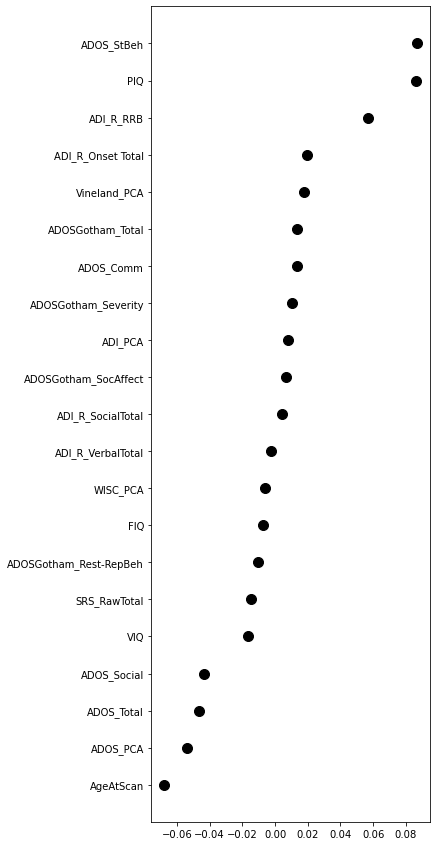

In [362]:
y = dr_sorted['rdelta'].values
x = np.arange(len(y))
lbls = dr_sorted['key'].values

plt.figure(figsize=(5,15))
plt.plot(y,x,'k.',markersize=20)
plt.yticks(x,labels=lbls,rotation=0);

In [363]:
dr.sort_values(by='rx',ascending=False).head()

key        rx        ry    rdelta        px        py  \
5               ADOS_StBeh  0.115933  0.028877  0.087056  0.050564  0.627351   
13  ADOSGotham_Rest-RepBeh  0.112735  0.123479 -0.010744  0.111971  0.081511   
10            SRS_RawTotal  0.108989  0.123514 -0.014524  0.134429  0.089547   
8                ADI_R_RRB  0.098479  0.041413  0.057065  0.083434  0.467517   
14        ADOSGotham_Total  0.097611  0.083934  0.013677  0.173495  0.242154   

        n  
5   285.0  
13  200.0  
10  190.0  
8   310.0  
14  196.0

In [364]:
dr.sort_values(by='ry',ascending=False).head()

key        rx        ry    rdelta        px        py  \
10            SRS_RawTotal  0.108989  0.123514 -0.014524  0.134429  0.089547   
13  ADOSGotham_Rest-RepBeh  0.112735  0.123479 -0.010744  0.111971  0.081511   
1                      FIQ  0.091869  0.099221 -0.007352  0.057556  0.040193   
14        ADOSGotham_Total  0.097611  0.083934  0.013677  0.173495  0.242154   
15     ADOSGotham_Severity  0.090785  0.080692  0.010093  0.205702  0.260887   

        n  
10  190.0  
13  200.0  
1   428.0  
14  196.0  
15  196.0

In [365]:
import scipy

In [366]:
linkage = scipy.cluster.hierarchy.linkage
dendrogram = scipy.cluster.hierarchy.dendrogram

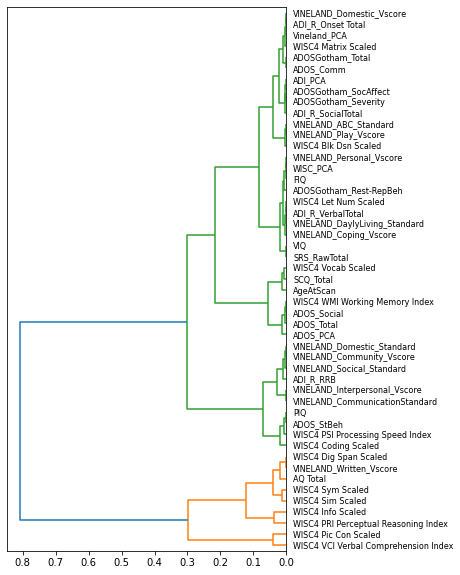

In [390]:
plt.figure(figsize=(5,10))
Z = linkage(1-dr['rdelta'].values[:,np.newaxis],'ward')
dendrogram(Z,0,orientation='left',labels=dr['key'].values);

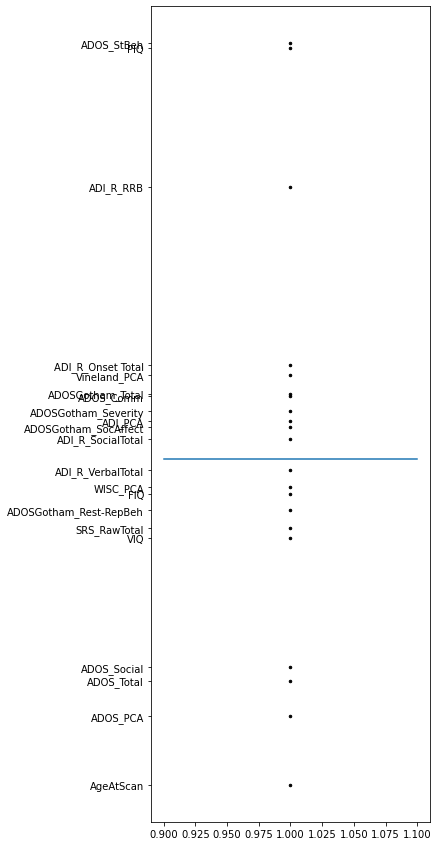

In [391]:
dr = dr[dr['n']>150]
c = len(dr)
plt.figure(figsize=(5,15))
plt.plot(np.ones(c),dr['rdelta'].values,'k.',markersize=5)
plt.yticks(dr['rdelta'].values,labels=dr['key'].values,rotation=0);
plt.plot([.9,1.1],[0,0])

In [ ]:
## REGRESSION with 16 dimensions

In [403]:
list(data_latent.keys())

['salient_vec_abide',
 'background_vec_abide',
 'vae_vec_abide',
 'salient_vec_sfari',
 'background_vec_sfari',
 'vae_vec_sfari']

In [405]:
data_latent['salient_vec_abide'].shape

(10, 982, 16)

In [418]:
# >>> import numpy as np
# >>> from sklearn.linear_model import LinearRegression
# >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# >>> # y = 1 * x_0 + 2 * x_1 + 3
# >>> y = np.dot(X, np.array([1, 2])) + 3
# >>> reg = LinearRegression().fit(X, y)
# >>> reg.score(X, y)
# 1.0
# >>> reg.coef_
# array([1., 2.])
# >>> reg.intercept_
# 3.0...
# >>> reg.predict(np.array([[3, 5]]))
# array([16.])

In [521]:
keys = ['AgeAtScan', 'Sex', 'FIQ', 'VIQ', 'PIQ','ADOS_Total', 'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh','SRS_awareness', 'SRS_cognition', 'SRS_communication',
       'SRS_motivation', 'SRS_manierisms']

LinearRegression = sklearn.linear_model.LinearRegression

coefss = list()
for i in range(10):
    coefs = list()
    for key in keys:
       #X = data_latent['salient_vec_abide'][i,patients,:]
        X = data_latent['background_vec_abide'][0,patients,:]
        #X = data_latent['vae_vec_abide'][0,patients,:]
        Y = df[key].values[patients]
        v = ~np.isnan(Y)

        X = X[v,:]
        Y = Y[v]

        reg = LinearRegression().fit(X, Y)
        coefs.append(reg.coef_)
    coefss.append(coefs)

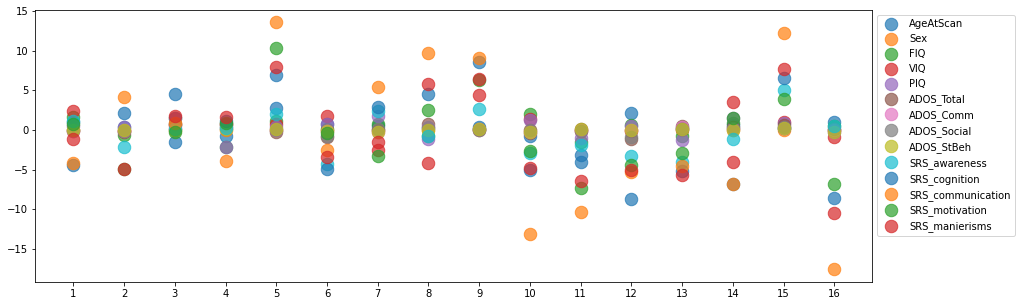

In [522]:
plt.figure(figsize=(15,5))
coef_mat = np.array(coefs).transpose()
coef_mat = np.array(coefss).mean(axis=0).transpose()
plt.plot(coef_mat,'.',markersize=25,alpha=.7)
plt.legend(keys,bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xticks(np.arange(16),labels=np.arange(16)+1);

In [501]:
keys = ['Sex','DSMIVTR']

LinearRegression = sklearn.linear_model.LinearRegression
coefs = list()

for key in keys:
    X = data_latent['salient_vec_abide'][0,patients,:]
    #X = data_latent['background_vec_abide'][0,patients,:]
    #X = data_latent['vae_vec_abide'][0,patients,:]
    Y = df[key].values[patients]
    v = ~np.isnan(Y)

    X = X[v,:]
    Y = Y[v]

    reg = LinearRegression().fit(X, Y)
    coefs.append(reg.coef_)

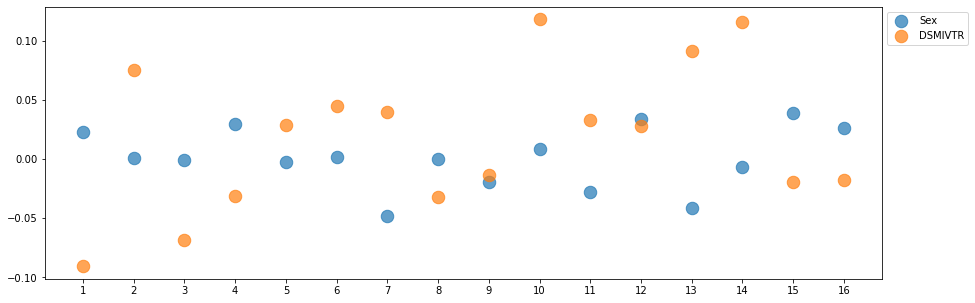

In [502]:
plt.figure(figsize=(15,5))
coef_mat = np.array(coefs).transpose()
plt.plot(coef_mat,'.',markersize=25,alpha=.7)
plt.legend(keys,bbox_to_anchor=(1.0, 1), loc='upper left')
plt.xticks(np.arange(16),labels=np.arange(16)+1);

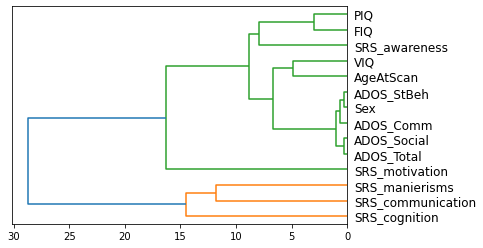

In [490]:
# Y = scipy.spatial.distance.pdist(coef_mat.transpose(),metric='euclidean')
# Z = linkage(Y,'ward');
# dendrogram(Z,orientation='left',labels=keys);